In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
(train_data , train_label) , (test_data , test_label) = imdb.load_data(num_words=10000)

In [5]:
print("train_data[0] := ",train_data[0])
print("\n\ntrain_label[0] := ",train_label[0])

train_data[0] :=  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


train_label[0] :=  1


In [6]:
max_ = max([max(inp) for inp in train_data])

In [7]:
print("Max in train_data := ",max_)

Max in train_data :=  9999


In [8]:
word_index = imdb.get_word_index()

In [9]:
rev_word_index = {}
for k,v in word_index.items():
    rev_word_index[v] = k

In [10]:
def list_to_str(L):
    s = ""
    for i in L:
        s += rev_word_index[i] +" "
    s = s[:-1] + "."
    return s

In [11]:
list_to_str(train_data[5])

'the effort still been that usually makes for of finished sucking ended and an because before if just though something know novel female i i slowly lot of above and with connect in of script their that out end his and i i.'

In [12]:
str1 = ["I am Ankit.","I am Ankita paul"]
tokenizer = Tokenizer(oov_token="<oov>")

In [13]:
tokenizer.fit_on_texts(str1)

In [14]:
tokenizer.texts_to_sequences(["I am raja"])

[[2, 3, 1]]

In [15]:
Seq = tokenizer.texts_to_sequences(str1)

In [16]:
pad_sequences(Seq,maxlen=10,padding="post")

array([[2, 3, 4, 0, 0, 0, 0, 0, 0, 0],
       [2, 3, 5, 6, 0, 0, 0, 0, 0, 0]])

In [17]:
m = 0
for inp in train_data:
    m = max(m , len(inp))

In [18]:
print(m)

2494


In [19]:
truncating = "post"
padding    = "post"
maxlen     = 120

In [20]:
X_train = pad_sequences(train_data,maxlen=maxlen,padding=padding,truncating=truncating)
X_test = pad_sequences(test_data,maxlen=maxlen,padding=padding,truncating=truncating)

In [22]:
import numpy as np
y_train = np.array(train_label,dtype=np.float64)
y_test  = np.array(test_label,dtype=np.float64)

In [23]:
print(X_train.shape)
print(X_test.shape )
print(y_train.shape)
print(y_test.shape)

(25000, 120)
(25000, 120)
(25000,)
(25000,)


In [24]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000 , 32 , input_length = maxlen),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16 , activation = "relu"),
    tf.keras.layers.Dense(16 , activation = "relu"),
    tf.keras.layers.Dense( 1 , activation = "sigmoid")
])

In [25]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 32)           320000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 320,817
Trainable params: 320,817
Non-trainable params: 0
_________________________________________________________________


In [26]:
model1.compile(optimizer=tf.keras.optimizers.RMSprop(lr = 0.001) ,
               loss = tf.keras.losses.binary_crossentropy ,
               metrics = ['acc'])

In [27]:
his1 = model1.fit(X_train,y_train,epochs=20,batch_size=512,validation_data=(X_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 148us/sample - loss: 0.6773 - acc: 0.6942 - val_loss: 0.6561 - val_acc: 0.7522
Epoch 2/20
25000/25000 [==============================] - 2s 83us/sample - loss: 0.6172 - acc: 0.7887 - val_loss: 0.5853 - val_acc: 0.7868
Epoch 3/20
25000/25000 [==============================] - 2s 71us/sample - loss: 0.5250 - acc: 0.8269 - val_loss: 0.4994 - val_acc: 0.8108
Epoch 4/20
25000/25000 [==============================] - 2s 72us/sample - loss: 0.4294 - acc: 0.8490 - val_loss: 0.4305 - val_acc: 0.8214
Epoch 5/20
25000/25000 [==============================] - 2s 70us/sample - loss: 0.3571 - acc: 0.8648 - val_loss: 0.3931 - val_acc: 0.8258
Epoch 6/20
25000/25000 [==============================] - 2s 65us/sample - loss: 0.3101 - acc: 0.8761 - val_loss: 0.3760 - val_acc: 0.8334
Epoch 7/20
25000/25000 [==============================] - 2s 72us/sample - loss: 0.2785 - acc: 0.8868 - val_loss: 0

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
sns.set_style("darkgrid")

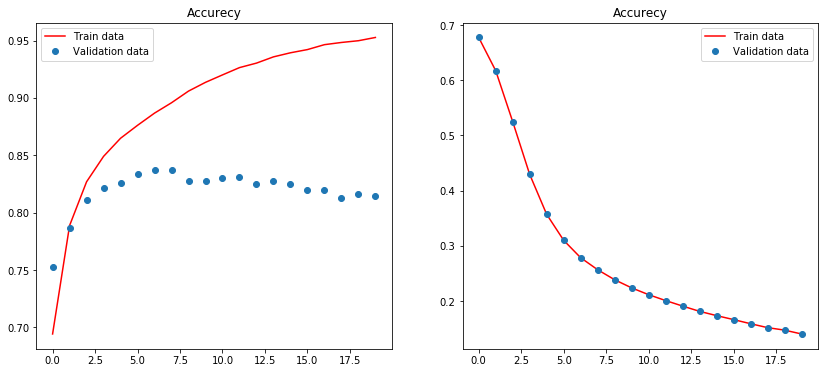

In [31]:
fig , ax = plt.subplots(1,2,figsize=(14,6))
ax[0].plot(his1.history['acc'],'r',label="Train data")
ax[0].plot(his1.history['val_acc'],'o',label="Validation data")
ax[0].set_title("Accurecy")
ax[0].legend()

ax[1].plot(his1.history['loss'],'r',label="Train data")
ax[1].plot(his1.history['loss'],'o',label="Validation data")
ax[1].set_title("Accurecy")
ax[1].legend()